In [15]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../data/review_sentiments_geo.csv')
df['State'] = df['State'].replace('New_York', 'New York')
df.head()

,State,Price,Service,Ambience,Food
0,New York,95.288551,97.628863,92.234720,88.897945
1,New York,93.299860,95.128507,93.034507,85.638448
2,New York,-82.298439,-84.439832,-69.404452,-66.739477
3,New York,87.124357,96.371484,89.717136,84.821187
4,New York,-87.897039,-83.790696,-60.608087,-99.370605


In [17]:
melted_df = df.melt(id_vars='State',
                    value_vars=['Price', 'Service', 'Ambience', 'Food'],
                    var_name='Aspect',
                    value_name='Sentiment Score')
melted_df.dropna(inplace=True)
melted_df.reset_index(drop=True, inplace=True)
melted_df.head()

,State,Aspect,Sentiment Score
0,New York,Price,95.288551
1,New York,Price,93.299860
2,New York,Price,-82.298439
3,New York,Price,87.124357
4,New York,Price,-87.897039


In [18]:
aspect_color_palette = {
    'Price': '#34C759',     # Green
    'Service': '#FFD60A',   # Yellow
    'Ambience': '#FF3B30',  # Red
    'Food': '#007AFF'       # Blue
}

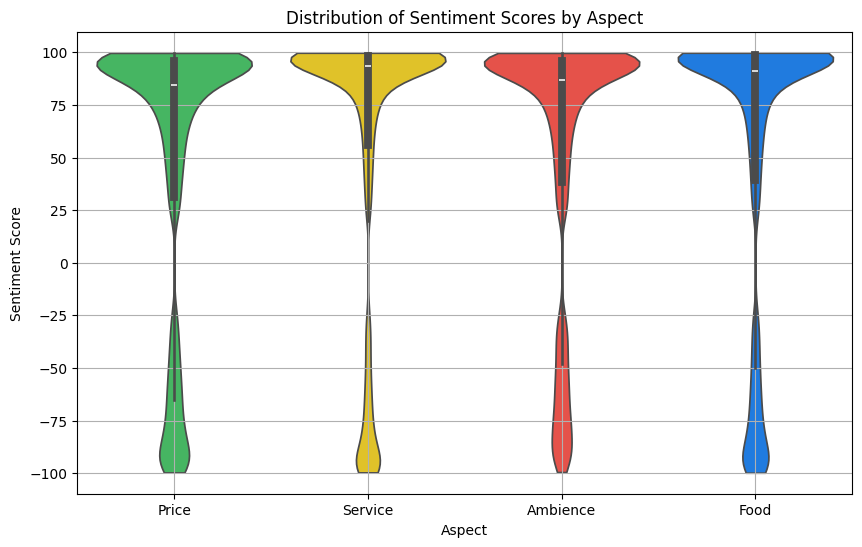

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Aspect', y='Sentiment Score', data=melted_df, cut=0, hue='Aspect', palette=aspect_color_palette, legend=False)
plt.title('Distribution of Sentiment Scores by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.savefig('../imgs/violin_plot.png', dpi=300)
plt.show()
plt.close()

In [20]:
state_color_palette = {
    'New York': '#007AFF',      # Blue
    'California': '#FFD60A',    # Yellow
    'Texas': '#FF3B30',         # Red
}

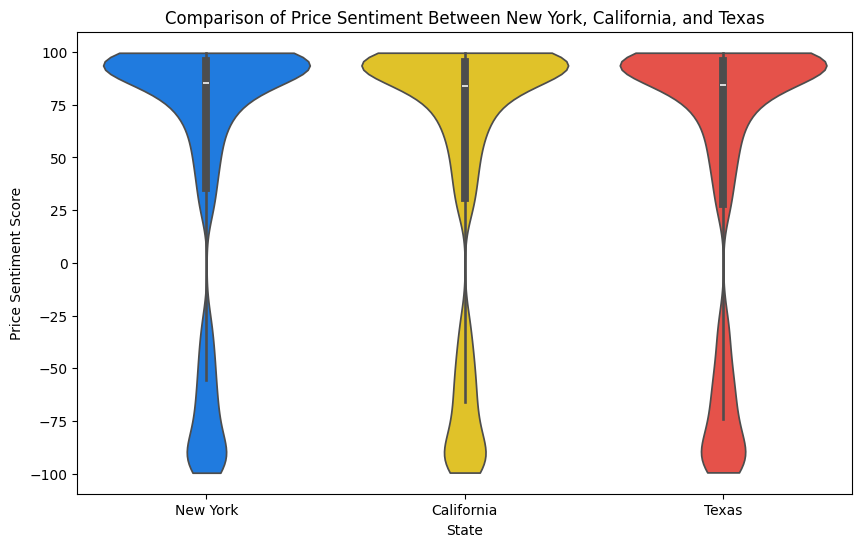

In [21]:
price_data = melted_df[melted_df['Aspect'] == 'Price']
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='Sentiment Score', data=price_data, cut=0, hue='State', palette=state_color_palette)
plt.title('Comparison of Price Sentiment Between New York, California, and Texas')
plt.xlabel('State')
plt.ylabel('Price Sentiment Score')
plt.savefig('../imgs/price_comparison.png', dpi=300)
plt.show()
plt.close()

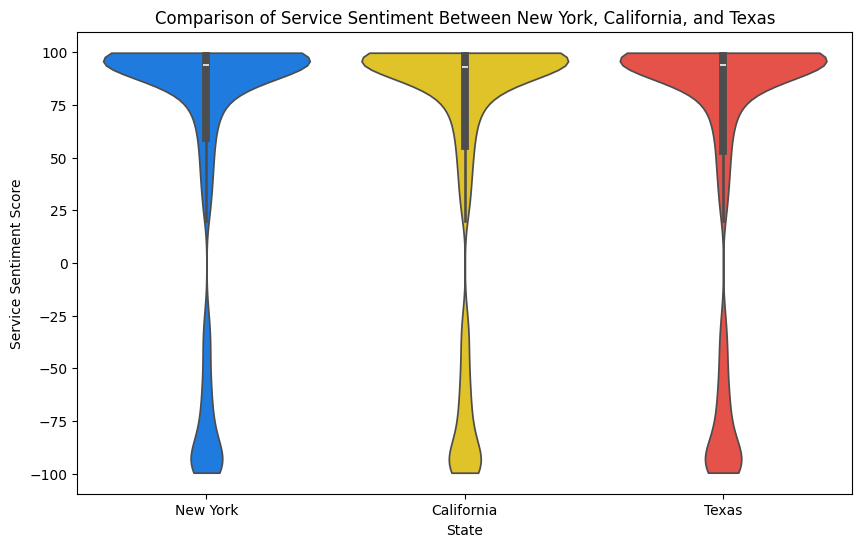

In [22]:
service_data = melted_df[melted_df['Aspect'] == 'Service']
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='Sentiment Score', data=service_data, cut=0, hue='State', palette=state_color_palette)
plt.title('Comparison of Service Sentiment Between New York, California, and Texas')
plt.xlabel('State')
plt.ylabel('Service Sentiment Score')
plt.savefig('../imgs/service_comparison.png', dpi=300)
plt.show()
plt.close()

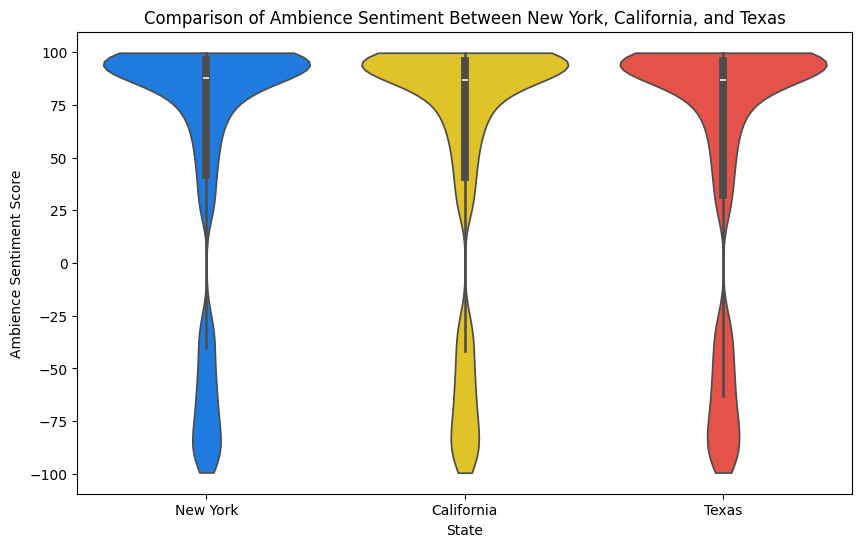

In [23]:
ambience_data = melted_df[melted_df['Aspect'] == 'Ambience']
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='Sentiment Score', data=ambience_data, cut=0, hue='State', palette=state_color_palette)
plt.title('Comparison of Ambience Sentiment Between New York, California, and Texas')
plt.xlabel('State')
plt.ylabel('Ambience Sentiment Score')
plt.savefig('../imgs/ambience_comparison.png', dpi=300)
plt.show()
plt.close()

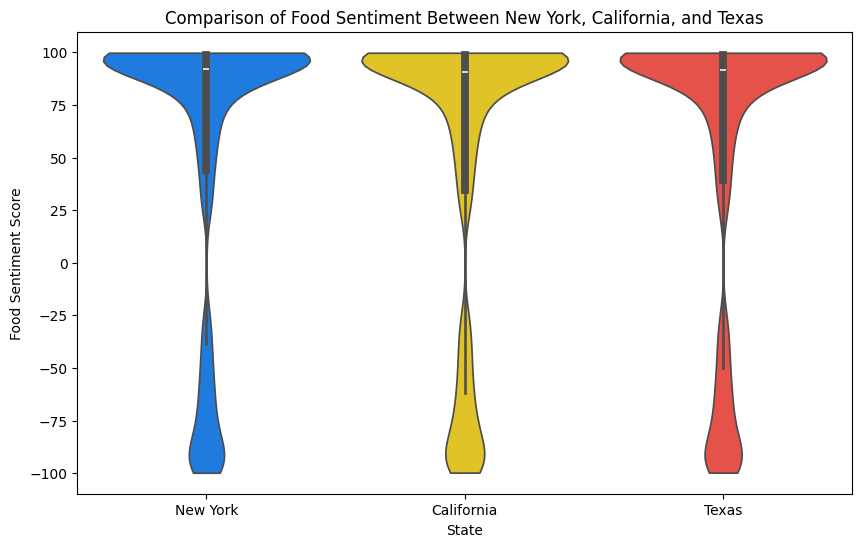

In [24]:
food_data = melted_df[melted_df['Aspect'] == 'Food']
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='Sentiment Score', data=food_data, cut=0, hue='State', palette=state_color_palette)
plt.title('Comparison of Food Sentiment Between New York, California, and Texas')
plt.xlabel('State')
plt.ylabel('Food Sentiment Score')
plt.savefig('../imgs/food_comparison.png', dpi=300)
plt.show()
plt.close()

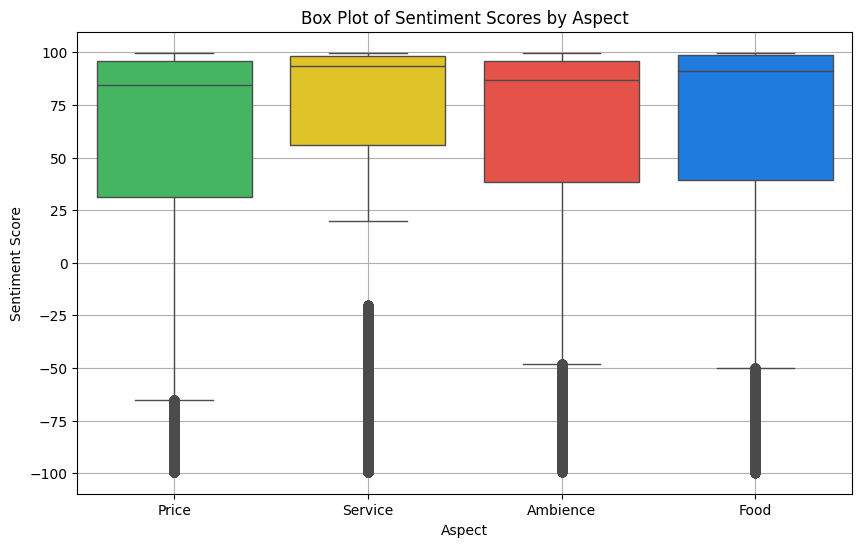

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aspect', y='Sentiment Score', data=melted_df, hue='Aspect', palette=aspect_color_palette, legend=False)
plt.title('Box Plot of Sentiment Scores by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.savefig('../imgs/box_plot.png', dpi=300)
plt.show()
plt.close()

In [26]:
mean_df = df.groupby('State').mean().reset_index()
mean_df.head()

,State,Price,Service,Ambience,Food
0,California,47.326981,57.315362,52.978811,50.541324
1,New York,49.082118,58.316350,53.421652,53.538023
2,Texas,46.335872,55.453877,50.172358,52.103580


In [27]:
aspects = ['Price', 'Service', 'Ambience', 'Food']

fig = go.Figure()

new_york_row = mean_df.loc[mean_df['State'] == 'New York']
new_york_r = new_york_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
new_york_r.append(new_york_r[0])

# New York
fig.add_trace(go.Scatterpolar(
      r=new_york_r,
      theta=aspects + [aspects[0]],
      name='New York',
      line=dict(color='#007AFF') # Blue
))

texas_row = mean_df.loc[mean_df['State'] == 'Texas']
texas_r = texas_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
texas_r.append(texas_r[0])

california_row = mean_df.loc[mean_df['State'] == 'California']
california_r = california_row[['Price', 'Service', 'Ambience', 'Food']].values.tolist()[0]
california_r.append(california_r[0])

# California
fig.add_trace(go.Scatterpolar(
      r=california_r,
      theta=aspects + [aspects[0]],
      name='California',
      line=dict(color='#FFD60A') # Yellow
))

# Texas
fig.add_trace(go.Scatterpolar(
      r=texas_r,
      theta=aspects + [aspects[0]],
      name='Texas',
      line=dict(color='#FF3B30') # Red
))

# Update radial axis range
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[40, 60])
    ),
    title=dict(
        text='Comparison of Aspect Means Between New York, California, and Texas',
        font=dict(size=18),
        x=0.5,
        y=0.95
    )
)

fig.write_image('../imgs/radar_chart.png', scale=3)
fig.show()